In [ ]:
Importing Panda package for Data Science

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("owid-covid-data.csv")
df = df.loc[df["location"].isin(["India"])]


In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
32444,IND,Asia,India,2020-01-30,1.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32445,IND,Asia,India,2020-01-31,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32446,IND,Asia,India,2020-02-01,1.0,0.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32447,IND,Asia,India,2020-02-02,2.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32448,IND,Asia,India,2020-02-03,3.0,1.0,NaN,NaN,NaN,NaN,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32868,IND,Asia,India,2021-03-29,12095855.0,56211.0,58437.000,162114.0,271.0,278.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32869,IND,Asia,India,2021-03-30,12149335.0,53480.0,59325.286,162468.0,354.0,289.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32870,IND,Asia,India,2021-03-31,12221665.0,72330.0,62018.714,162927.0,459.0,319.286,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645
32871,IND,Asia,India,2021-04-01,12303131.0,81466.0,65211.286,163396.0,469.0,349.571,...,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66,0.645


In [4]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [5]:
df=df[["location","total_cases","date"]]
df.head()

,location,total_cases,date
32444,India,1.0,2020-01-30
32445,India,1.0,2020-01-31
32446,India,1.0,2020-02-01
32447,India,2.0,2020-02-02
32448,India,3.0,2020-02-03


In [6]:
df = df.reset_index()
df["index"] = df.index
df


,index,location,total_cases,date
0,0,India,1.0,2020-01-30
1,1,India,1.0,2020-01-31
2,2,India,1.0,2020-02-01
3,3,India,2.0,2020-02-02
4,4,India,3.0,2020-02-03
...,...,...,...,...
424,424,India,12095855.0,2021-03-29
425,425,India,12149335.0,2021-03-30
426,426,India,12221665.0,2021-03-31
427,427,India,12303131.0,2021-04-01


In [7]:
import matplotlib.pyplot as plt

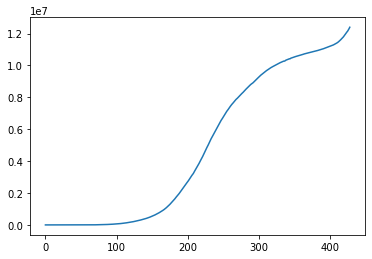

In [8]:
plt.plot(df["total_cases"])
plt.show()

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [10]:
x=np.array(df["index"]).reshape(-1,1)
y=np.array(df["total_cases"]).reshape(-1,1)
poly=PolynomialFeatures(degree=3)
x=poly.fit_transform(x)
Linear_reg=LinearRegression()
Linear_reg.fit(x,y)
Linear_reg.score(x,y)

0.9868121025394586

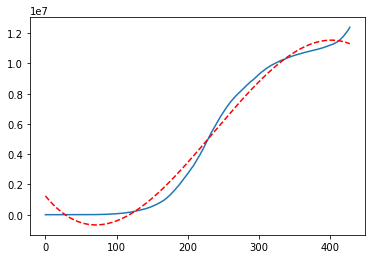

In [11]:
plt.plot(df["total_cases"])
plt.plot(Linear_reg.predict(x), "r--")
plt.show()

In [14]:
Linear_reg.predict(poly.fit_transform([[429]]))

array([[11281698.28368933]])